In [1]:
import pandas as pd 
import numpy as np 


import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# EDA
df = pd.read_csv('C:/Users/estel/Documents/Ironhack/Unit1/lab-customer-analysis-round7/lab-customer-anaylisis-round-7/files_for_lab/csv_files/marketing_customer_analysis.csv')
display(df)



Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor           2/24/11         Employed      F   56274  ...   
1     Bachelor           1/31/11       Unemployed      F       0  ...   
2     Bachelor           2/19/11         Employed      F   48767  ...   
3     Bachelor           1/20/11       Unemployed      M       0  ...   
4     Bachelor            2/3/11         Employed      M   43836  ...   
...        ...               ...              ...    ...     ...  ...   
9129  Bachelor           2/10/11         Employed      M   71941  ...   
9130   College           2/12/11         Employed      F   21604  ...   
9131  Bachelor            2/6/11       Unemployed      M       0  ...   
9132   College            2/3/11         Employed      M   21941  ...   
9133   College           2/14/11       Unemployed      M       0  ...   

     Months Since Policy Inception Number of Open Complaints  \
0                                5                         0   
1                               42                         0   
2                               38                         0   
3                               65                         0   
4                               44                         0   
...                            ...                       ...   
9129                            89                         0   
9130                            28                         0   
9131                            37                         3   
9132                             3                         0   
9133                            90                         0   

      Number of Policies     Policy Type        Policy  Renew Offer Type  \
0                      1  Corporate Auto  Corporate L3            Offer1   
1                      8   Personal Auto   Personal L3            Offer3   
2                      2   Personal Auto   Personal L3            Offer1   
3                      7  Corporate Auto  Corporate L2            Offer1   
4                      1   Personal Auto   Personal L1            Offer1   
...                  ...             ...           ...               ...   
9129                   2   Personal Auto   Personal L1            Offer2   
9130                   1  Corporate Auto  Corporate L3            Offer1   
9131                   2  Corporate Auto  Corporate L2            Offer1   
9132                   3   Personal Auto   Personal L2            Offer3   
9133                   1  Corporate Auto  Corporate L3            Offer4   

      Sales Channel Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent         384.811147   Two-Door Car      Medsize  
1             Agent        1131.464935  Four-Door Car      Medsize  
2             Agent         566.472247   Two-Door Car      Medsize  
3       Call Center         529.881344            SUV      Medsize  
4             Agent         138.130879  Four-Door Car      Medsize  
...             ...                ...            ...          ...  
9129            Web         198.234764  Four-Door Car      Medsize  
9130         Bran

In [2]:
df.columns = df.columns.str.lower()

In [3]:
df.columns = df.columns.str.replace(' ', '_')
display(df.columns)

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [4]:
df.describe(include = 'all')

customer       state  customer_lifetime_value response coverage  \
count      9134        9134              9134.000000     9134     9134   
unique     9134           5                      NaN        2        3   
top     BU79786  California                      NaN       No    Basic   
freq          1        3150                      NaN     7826     5568   
mean        NaN         NaN              8004.940475      NaN      NaN   
std         NaN         NaN              6870.967608      NaN      NaN   
min         NaN         NaN              1898.007675      NaN      NaN   
25%         NaN         NaN              3994.251794      NaN      NaN   
50%         NaN         NaN              5780.182197      NaN      NaN   
75%         NaN         NaN              8962.167041      NaN      NaN   
max         NaN         NaN             83325.381190      NaN      NaN   

       education effective_to_date employmentstatus gender        income  ...  \
count       9134              9134             9134   9134   9134.000000  ...   
unique         5                59                5      2           NaN  ...   
top     Bachelor           1/10/11         Employed      F           NaN  ...   
freq        2748               195             5698   4658           NaN  ...   
mean         NaN               NaN              NaN    NaN  37657.380009  ...   
std          NaN               NaN              NaN    NaN  30379.904734  ...   
min          NaN               NaN              NaN    NaN      0.000000  ...   
25%          NaN               NaN              NaN    NaN      0.000000  ...   
50%          NaN               NaN              NaN    NaN  33889.500000  ...   
75%          NaN               NaN              NaN    NaN  62320.000000  ...   
max          NaN               NaN              NaN    NaN  99981.000000  ...   

       months_since_policy_inception number_of_open_complaints  \
count                    9134.000000               9134.000000   
unique                           NaN                       NaN   
top                              NaN                       NaN   
freq                             NaN                       NaN   
mean                       48.064594                  0.384388   
std                        27.905991                  0.910384   
min                         0.000000                  0.000000   
25%                        24.000000                  0.000000   
50%                        48.000000                  0.000000   
75%                        71.000000                  0.000000   
max                        99.000000                  5.000000   

        number_of_policies    policy_type       policy  renew_offer_type  \
count          9134.000000           9134         9134              9134   
unique                 NaN              3            9                 4   
top                    NaN  Personal Auto  Personal L3            Offer1   
freq                   NaN           6788         3426              3752   
mean              2.966170            NaN          NaN               NaN   
std               2.390182            NaN          NaN               NaN   
min               1.000000            NaN          NaN               NaN   
25%               1.000000            NaN          NaN               NaN   
50%               2.000000            NaN          NaN               NaN   
75%               4.000000            NaN          NaN               NaN   
max               9.000000            NaN          NaN               NaN   

        sales_channel total_claim_amount  vehicle_class vehicle_size  
count            9134        9134.000000           9134         9134  
unique              4                NaN              6            3  
top             Agent                NaN  Four-Door Car      Medsize  
freq             3477                NaN           4621         6424  
mean              NaN         434.088794            NaN          NaN  
std          

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

We don't seem to have NaN (all columns are not null in the info)

In [6]:
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [7]:
numerical_var = df.select_dtypes(exclude = 'object').columns.tolist() #list of string
categorical_var = df.select_dtypes(include = 'object').columns.tolist() #list of string
print(len(numerical_var),' numerical var: ', numerical_var, '\n',len(categorical_var), 'categorical var: ', categorical_var, )

8  numerical var:  ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount'] 
 16 categorical var:  ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


In [8]:
df.describe(include = 'all')

customer       state  customer_lifetime_value response coverage  \
count      9134        9134              9134.000000     9134     9134   
unique     9134           5                      NaN        2        3   
top     BU79786  California                      NaN       No    Basic   
freq          1        3150                      NaN     7826     5568   
mean        NaN         NaN              8004.940475      NaN      NaN   
std         NaN         NaN              6870.967608      NaN      NaN   
min         NaN         NaN              1898.007675      NaN      NaN   
25%         NaN         NaN              3994.251794      NaN      NaN   
50%         NaN         NaN              5780.182197      NaN      NaN   
75%         NaN         NaN              8962.167041      NaN      NaN   
max         NaN         NaN             83325.381190      NaN      NaN   

       education effective_to_date employmentstatus gender        income  ...  \
count       9134              9134             9134   9134   9134.000000  ...   
unique         5                59                5      2           NaN  ...   
top     Bachelor           1/10/11         Employed      F           NaN  ...   
freq        2748               195             5698   4658           NaN  ...   
mean         NaN               NaN              NaN    NaN  37657.380009  ...   
std          NaN               NaN              NaN    NaN  30379.904734  ...   
min          NaN               NaN              NaN    NaN      0.000000  ...   
25%          NaN               NaN              NaN    NaN      0.000000  ...   
50%          NaN               NaN              NaN    NaN  33889.500000  ...   
75%          NaN               NaN              NaN    NaN  62320.000000  ...   
max          NaN               NaN              NaN    NaN  99981.000000  ...   

       months_since_policy_inception number_of_open_complaints  \
count                    9134.000000               9134.000000   
unique                           NaN                       NaN   
top                              NaN                       NaN   
freq                             NaN                       NaN   
mean                       48.064594                  0.384388   
std                        27.905991                  0.910384   
min                         0.000000                  0.000000   
25%                        24.000000                  0.000000   
50%                        48.000000                  0.000000   
75%                        71.000000                  0.000000   
max                        99.000000                  5.000000   

        number_of_policies    policy_type       policy  renew_offer_type  \
count          9134.000000           9134         9134              9134   
unique                 NaN              3            9                 4   
top                    NaN  Personal Auto  Personal L3            Offer1   
freq                   NaN           6788         3426              3752   
mean              2.966170            NaN          NaN               NaN   
std               2.390182            NaN          NaN               NaN   
min               1.000000            NaN          NaN               NaN   
25%               1.000000            NaN          NaN               NaN   
50%               2.000000            NaN          NaN               NaN   
75%               4.000000            NaN          NaN               NaN   
max               9.000000            NaN          NaN               NaN   

        sales_channel total_claim_amount  vehicle_class vehicle_size  
count            9134        9134.000000           9134         9134  
unique              4                NaN              6            3  
top             Agent                NaN  Four-Door Car      Medsize  
freq             3477                NaN           4621         6424  
mean              NaN         434.088794            NaN          NaN  
std          

In [9]:
df.describe(exclude = 'object')

customer_lifetime_value        income  monthly_premium_auto  \
count              9134.000000   9134.000000           9134.000000   
mean               8004.940475  37657.380009             93.219291   
std                6870.967608  30379.904734             34.407967   
min                1898.007675      0.000000             61.000000   
25%                3994.251794      0.000000             68.000000   
50%                5780.182197  33889.500000             83.000000   
75%                8962.167041  62320.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       months_since_last_claim  months_since_policy_inception  \
count              9134.000000                    9134.000000   
mean                 15.097000                      48.064594   
std                  10.073257                      27.905991   
min                   0.000000                       0.000000   
25%                   6.000000                      24.000000   
50%                  14.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       number_of_open_complaints  number_of_policies  total_claim_amount  
count                9134.000000         9134.000000         9134.000000  
mean                    0.384388            2.966170          434.088794  
std                     0.910384            2.390182          290.500092  
min                     0.000000            1.000000            0.099007  
25%                     0.000000            1.000000          272.258244  
50%                     0.000000            2.000000          383.945434  
75%                     0.000000            4.000000          547.514839  
max                     5.000000            9.000000         2893.239678

We want to predict the total_claim_amount

In [10]:
df.corr(numeric_only=True)

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.024366   
income                                        0.024366  1.000000   
monthly_premium_auto                          0.396262 -0.016665   
months_since_last_claim                       0.011517 -0.026715   
months_since_policy_inception                 0.009418 -0.000875   
number_of_open_complaints                    -0.036343  0.006408   
number_of_policies                            0.021955 -0.008656   
total_claim_amount                            0.226451 -0.355254   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.396262                 0.011517   
income                                    -0.016665                -0.026715   
monthly_premium_auto                       1.000000                 0.005026   
months_since_last_claim                    0.005026                 1.000000   
months_since_policy_inception              0.020257                -0.042959   
number_of_open_complaints                 -0.013122                 0.005354   
number_of_policies                        -0.011233                 0.009136   
total_claim_amount                         0.632017                 0.007563   

                               months_since_policy_inception  \
customer_lifetime_value                             0.009418   
income                                             -0.000875   
monthly_premium_auto                                0.020257   
months_since_last_claim                            -0.042959   
months_since_policy_inception                       1.000000   
number_of_open_complaints                          -0.001158   
number_of_policies                                 -0.013333   
total_claim_amount                                  0.003335   

                               number_of_open_complaints  number_of_policies  \
customer_lifetime_value                        -0.036343            0.021955   
income                                          0.006408           -0.008656   
monthly_premium_auto                           -0.013122           -0.011233   
months_since_last_claim                         0.005354            0.009136   
months_since_policy_inception                  -0.001158           -0.013333   
number_of_open_complaints                       1.000000            0.001498   
number_of_policies                              0.001498            1.000000   
total_claim_amount                             -0.014241           -0.002354   

                               total_claim_amount  
customer_lifetime_value                  0.226451  
income                                  -0.355254  
monthly_premium_auto                     0.632017  
months_since_last_claim                  0.007563  
months_since_policy_inception            0.003335  
number_of_open_complaints               -0.014241  
number_of_policies                      -0.002354  
total_claim_amount                       1.000000

total_claim_amount seems to have a higher correlation(0.632017) with monthly_premium_auto than with the rest
The second more important influence seems to be customer_lifetime_value (0.226451)
The relation with income(-0.35), number_of_open_complaints and number_of_policies is negative

Text(0.5, 1.0, 'Total claim amount')

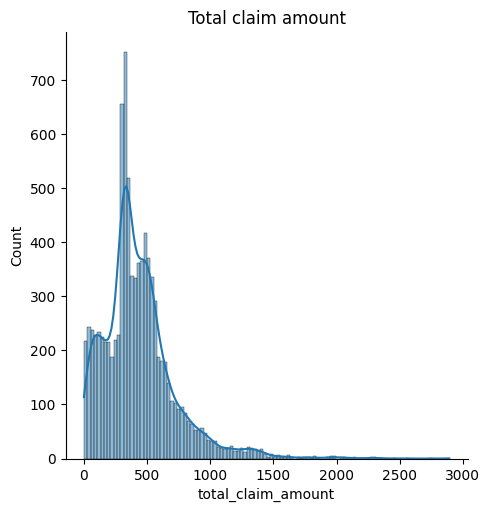

In [11]:
sns.displot(df.total_claim_amount, kde = True)
plt.title('Total claim amount')

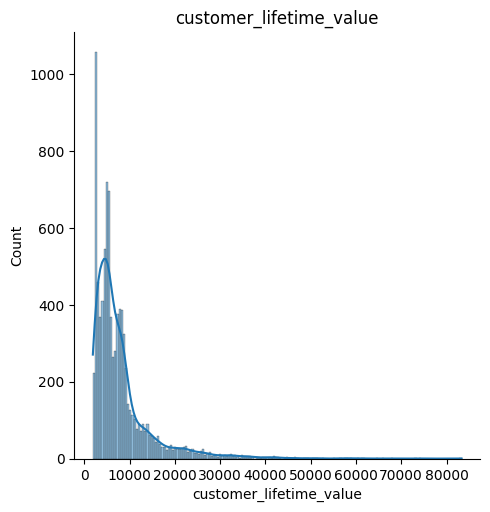

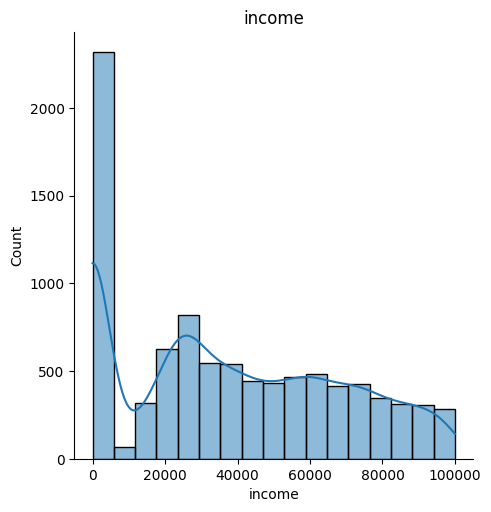

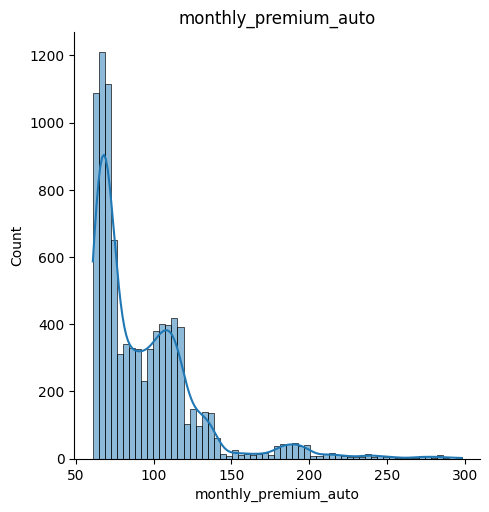

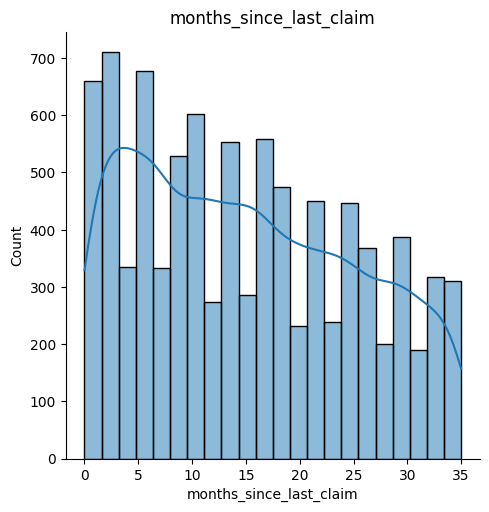

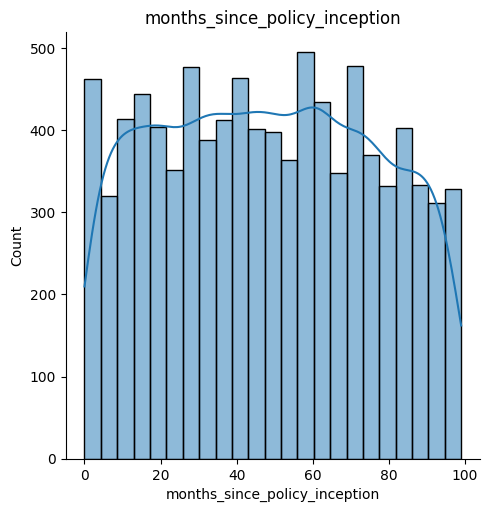

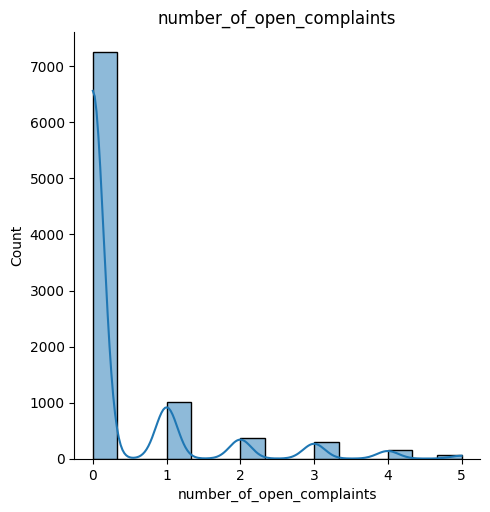

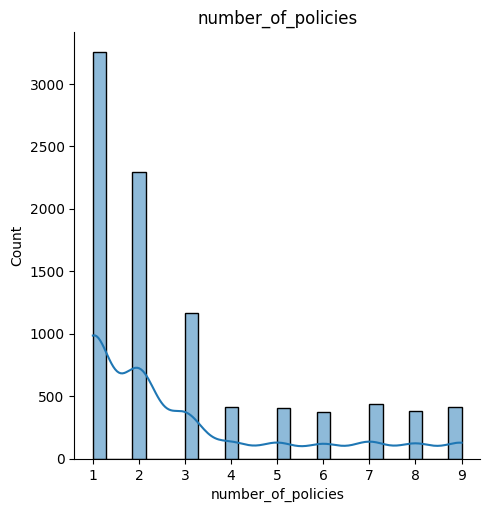

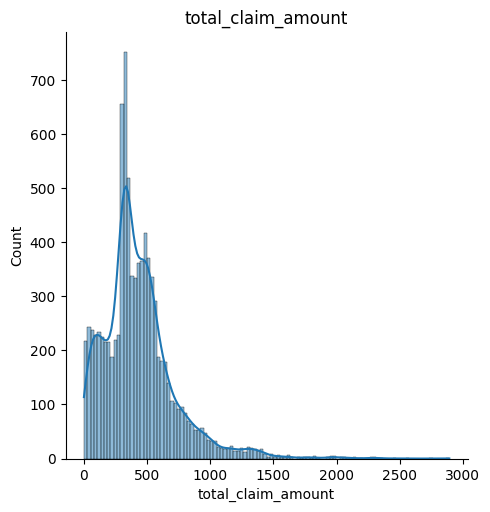

In [12]:
#graphical relation between total_claim_amount and the other numerical variables
for col in numerical_var:
    sns.displot(df[col], kde = True)
    plt.title(col)

In [13]:
numerical_df = df[numerical_var]
print(numerical_df.isna().sum())
display(numerical_df)

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64


customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                             0                   1          384.811147  
1                             0                   8         1131.464935  
2                             0                   2          566.472247  
3                             0                   7          529.881344  
4                             0                   1          138.130879  
...                         ...                 ...                 ...  
9129                          0                   2          198.234764  
9130                          0                   1          379.200000  
9131                          3                   2          790.784983  
9132                          0                   3          691.200000  
9133                          0                   1          369.600000  

[9134 rows x 8 columns]

In [14]:

fig = px.scatter_matrix(df, dimensions = numerical_df ,color='total_claim_amount')
fig.update_layout(
    title='Scatter matrix for total claim amount',
    width=2000,
    height=1600,
)
fig.show()

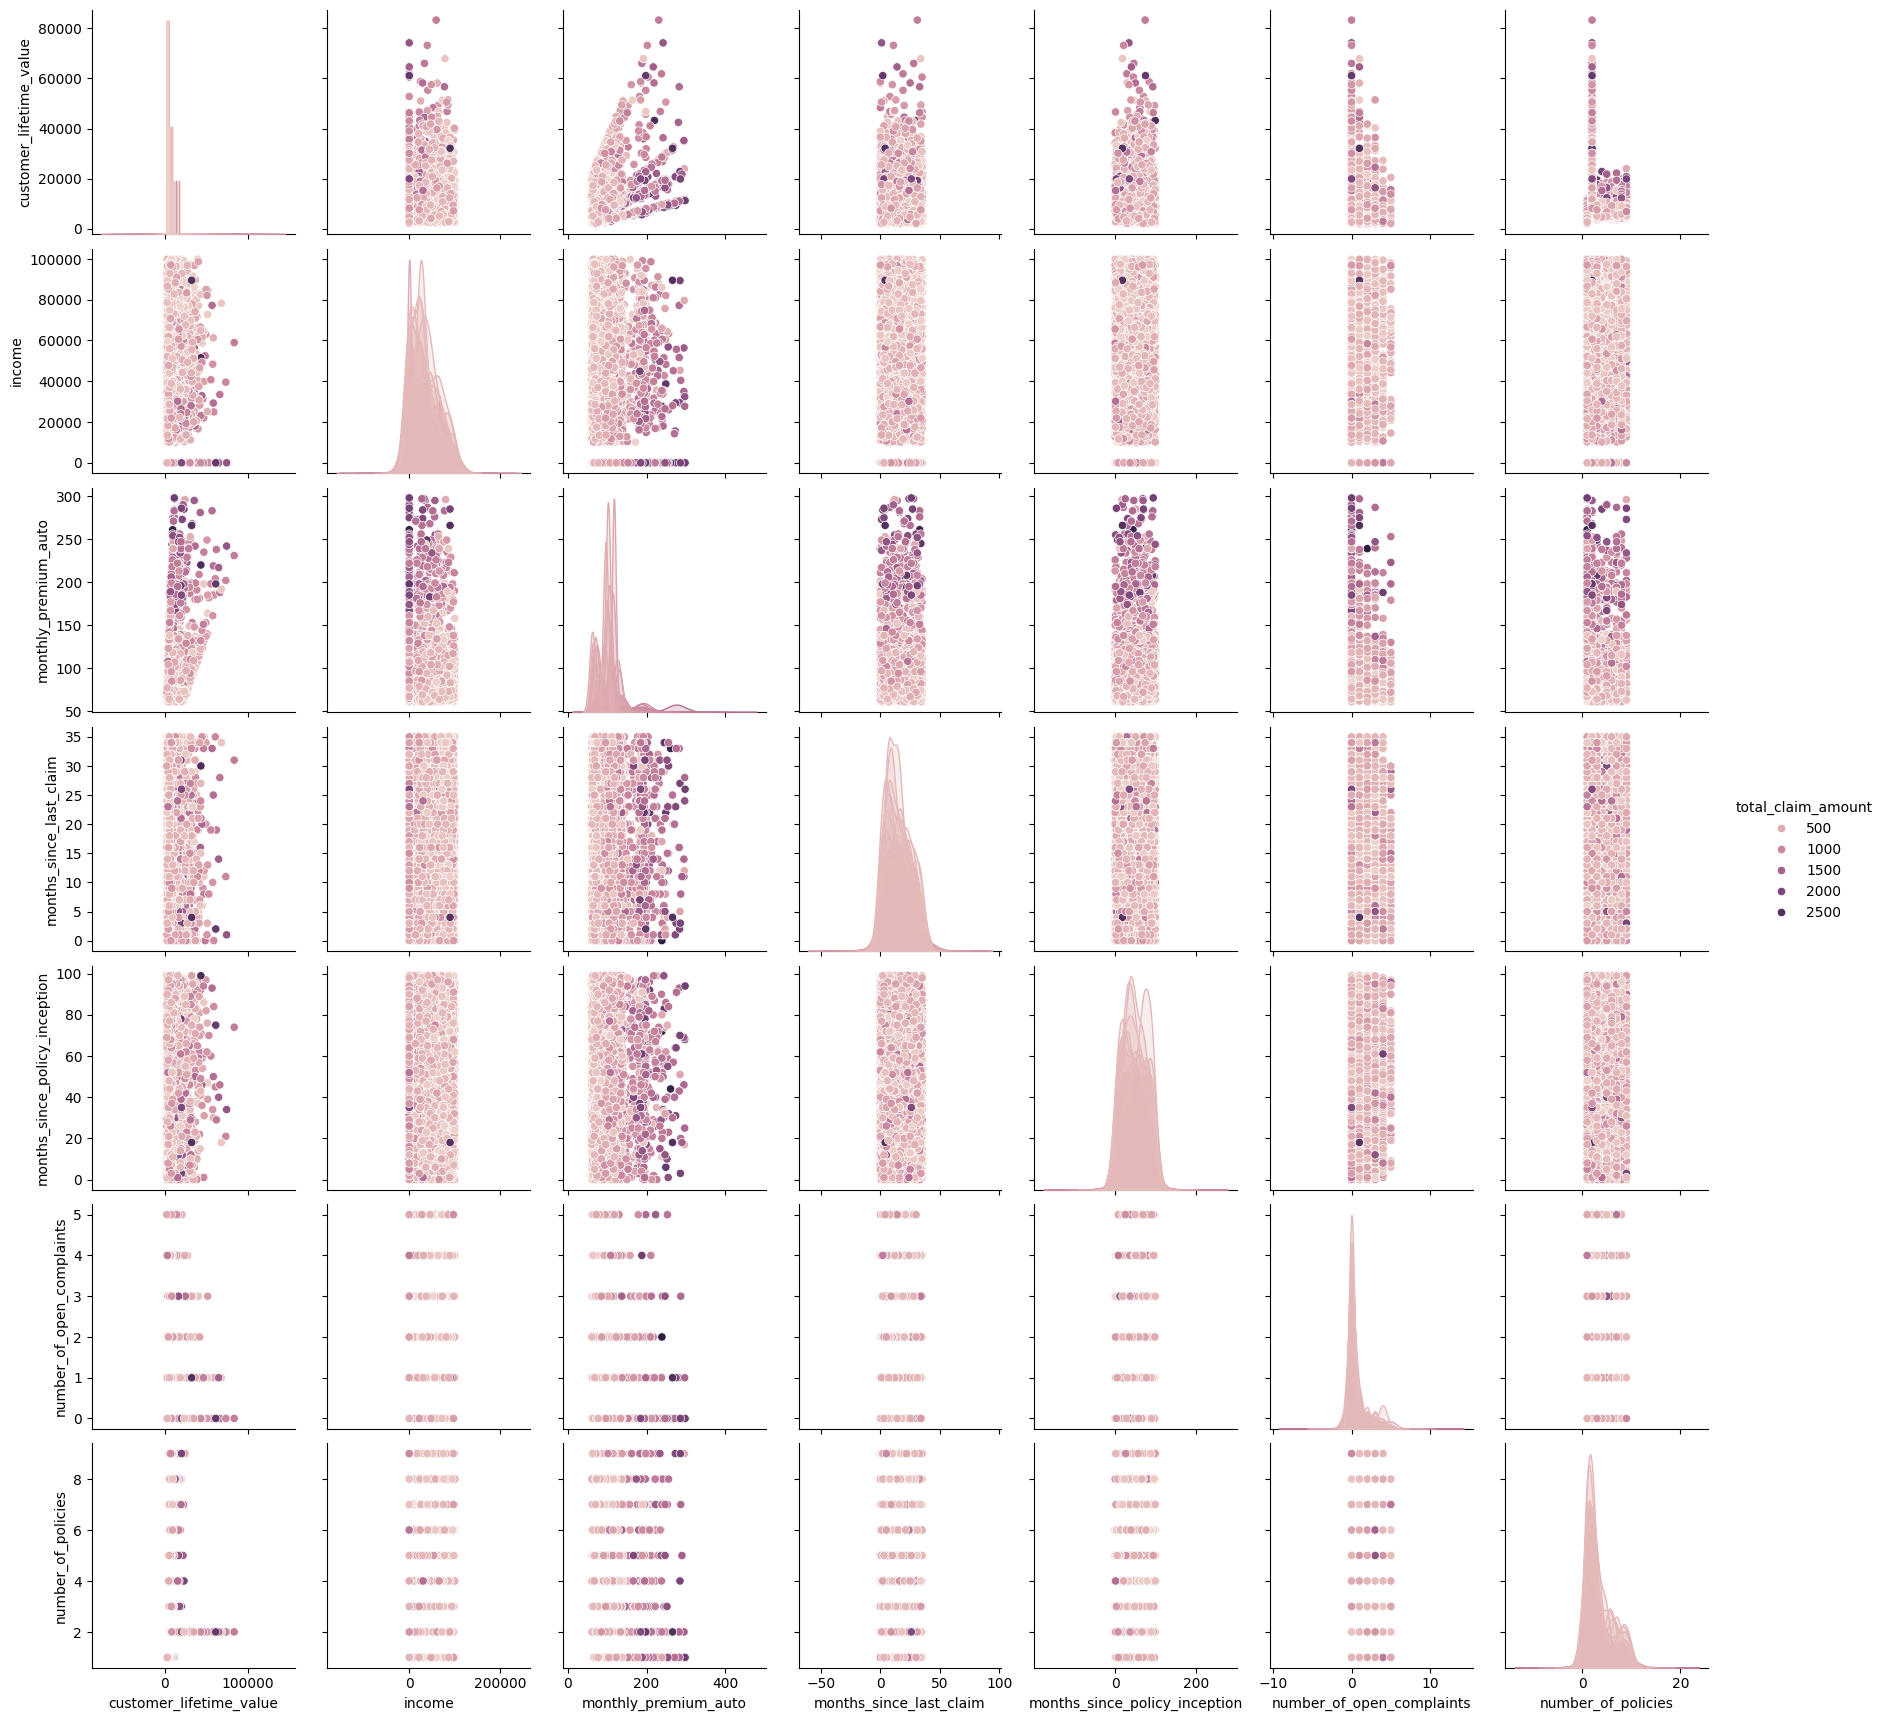

In [15]:
sns.pairplot(df, hue = 'total_claim_amount')

The diagonal is equivalent to a displot, so we see the distribution of a single variable of the features (it is an histogram)
The scatter plots in the lower and upper triangles show the relationship(or lack of) two variables.



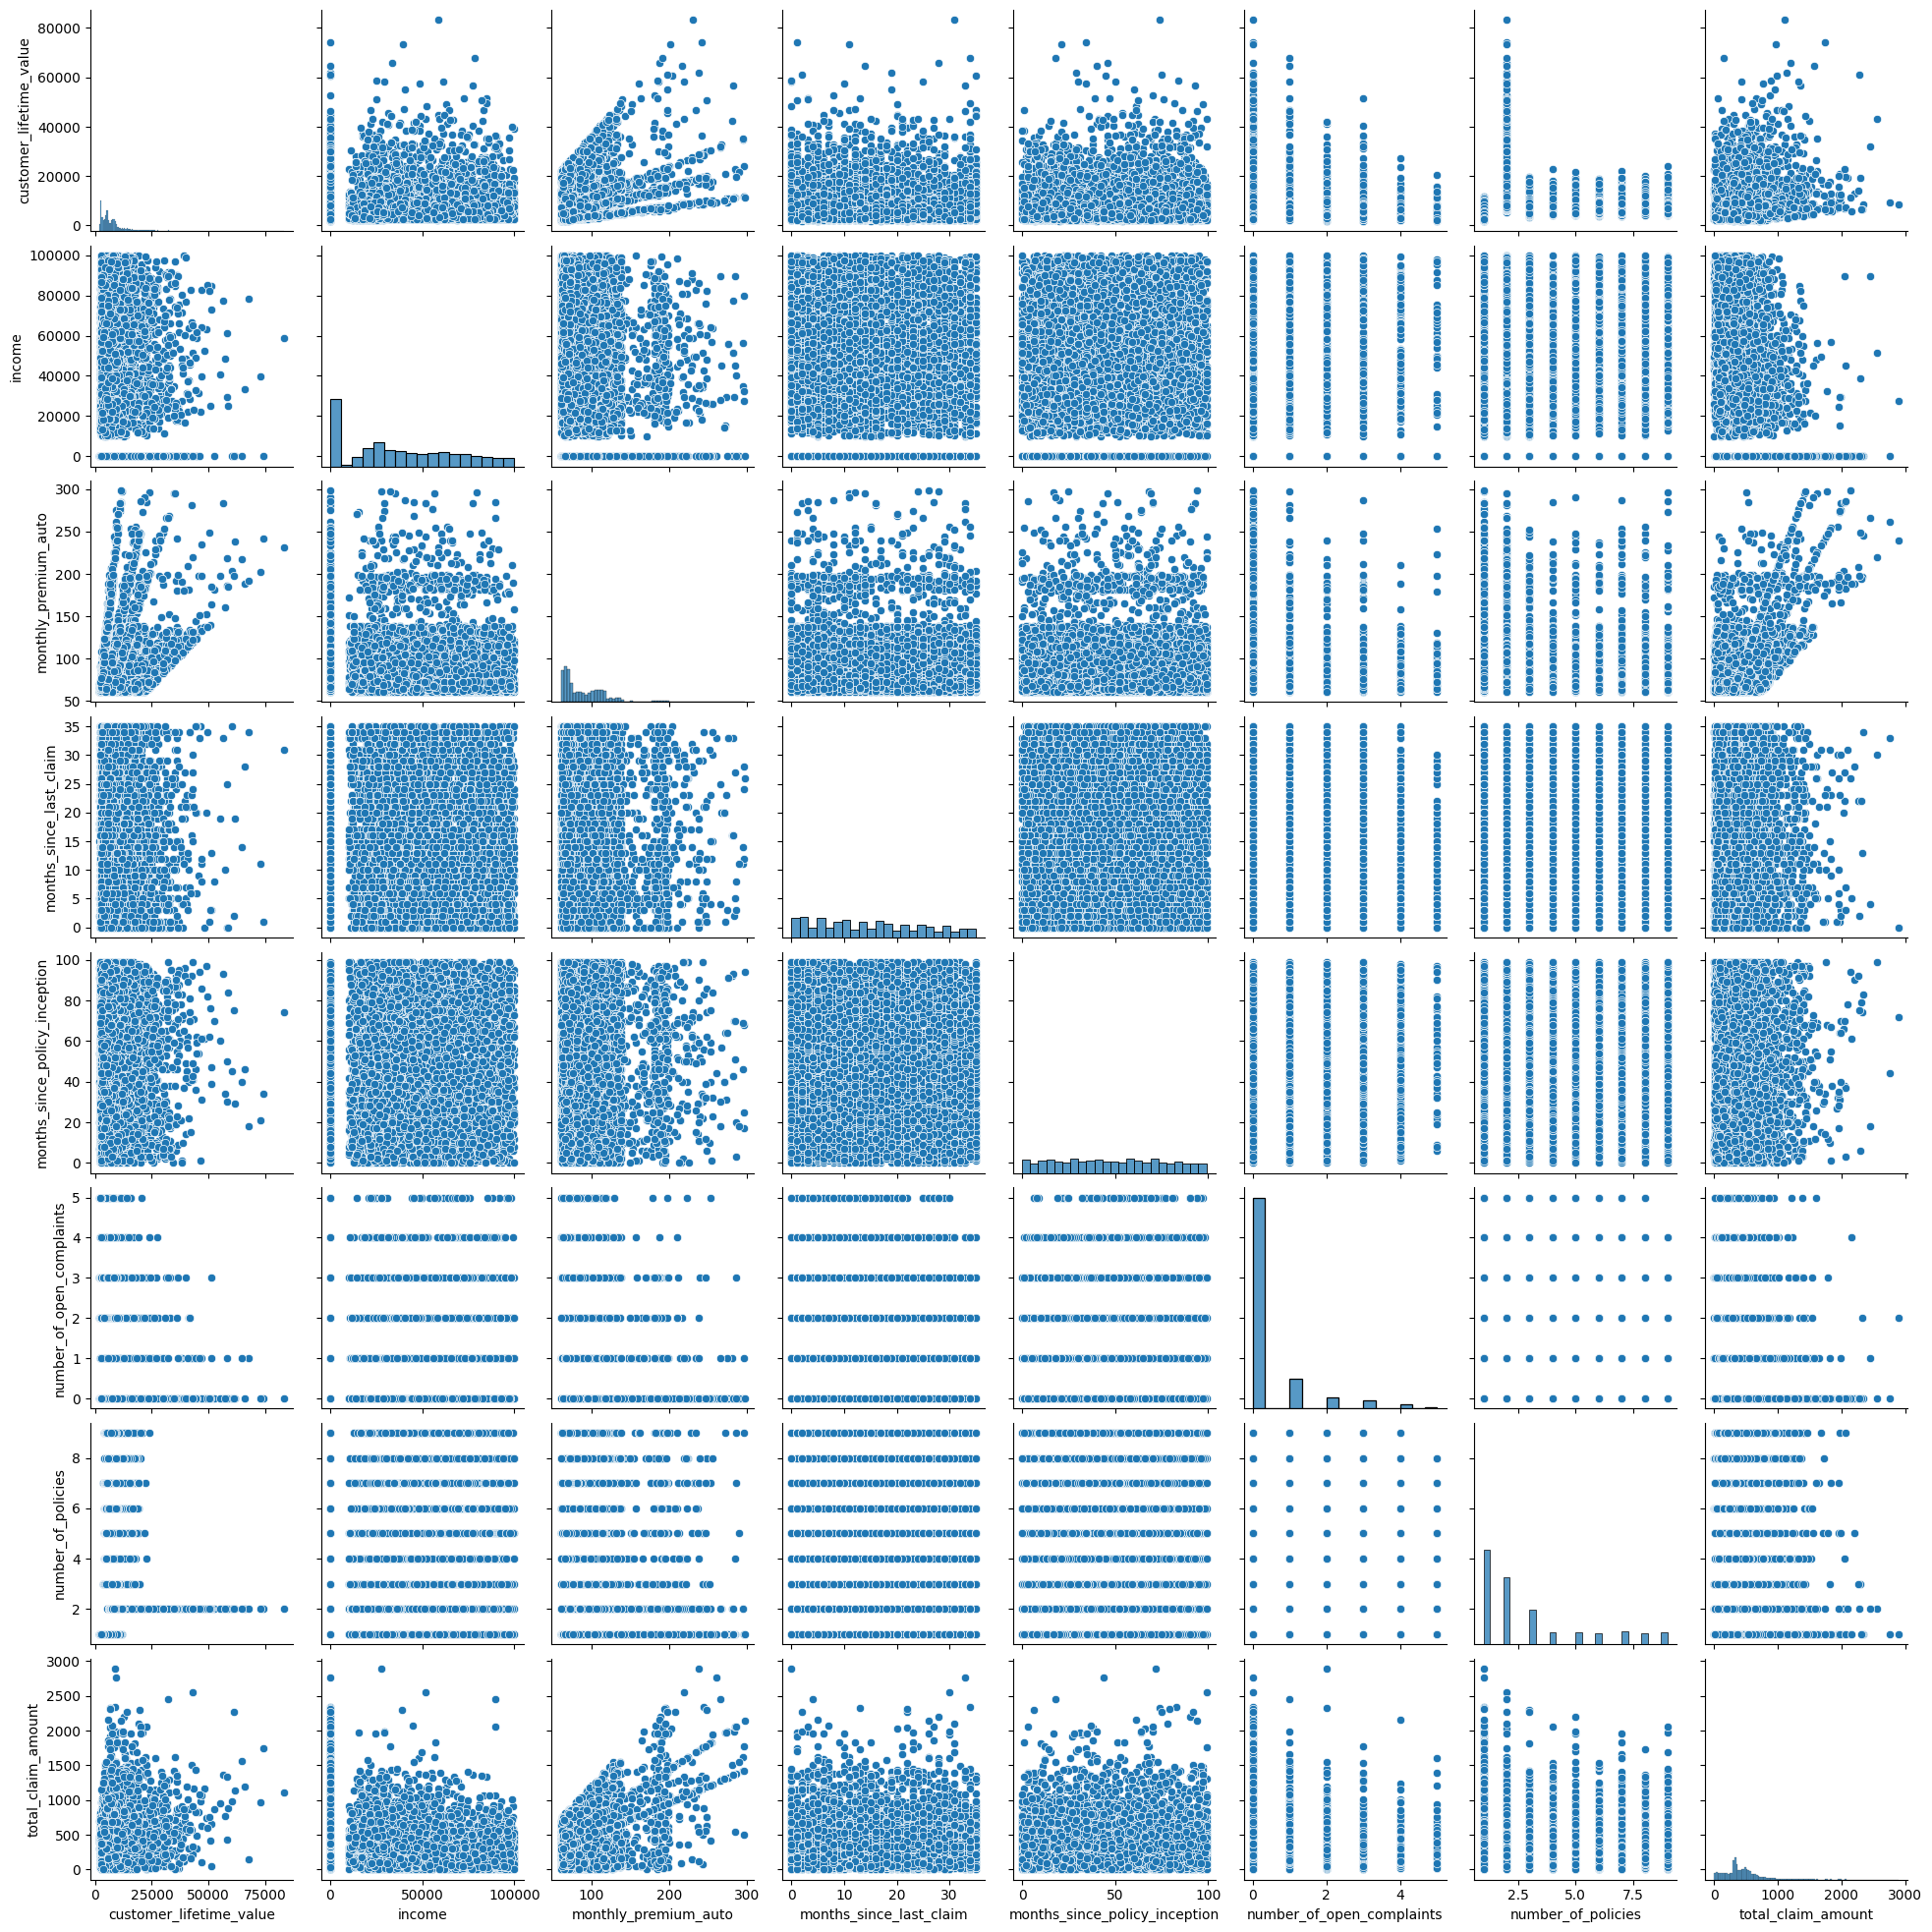

In [16]:
sns.pairplot(df)

In [17]:
for col in categorical_var:
    display(df[col].value_counts())

customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: count, Length: 9134, dtype: int64

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

response
No     7826
Yes    1308
Name: count, dtype: int64

coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

effective_to_date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/11     149
2/18/11    149
2/2/11     149
1/1/11     148
2/21/11    148
1/24/11    147
1/9/11     146
1/30/11    145
1/13/11    145
2/6/11     144
1/6/11     143
2/23/11    143
1/16/11    142
2/16/11    139
2/13/11    139
2/24/11    139
2/9/11     137
2/17/11    136
1/22/11    136
2/8/11     134
2/20/11    132
2/15/11    130
1/12/11    126
1/4/11     115
Name: count, dtype: int64

employmentstatus
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

gender
F    4658
M    4476
Name: count, dtype: int64

location_code
Suburban    5779
Rural       1773
Urban       1582
Name: count, dtype: int64

marital_status
Married     5298
Single      2467
Divorced    1369
Name: count, dtype: int64

policy_type
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: count, dtype: int64

policy
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: count, dtype: int64

renew_offer_type
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: count, dtype: int64

sales_channel
Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: count, dtype: int64

vehicle_class
Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: count, dtype: int64

vehicle_size
Medsize    6424
Small      1764
Large       946
Name: count, dtype: int64

It doesn't seem to be a high correlation between variables so no need to drop numerical variables

In [18]:
numerical_df

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                             0                   1          384.811147  
1                             0                   8         1131.464935  
2                             0                   2          566.472247  
3                             0                   7          529.881344  
4                             0                   1          138.130879  
...                         ...                 ...                 ...  
9129                          0                   2          198.234764  
9130                          0                   1          379.200000  
9131                          3                   2          790.784983  
9132                          0                   3          691.200000  
9133                          0                   1          369.600000  

[9134 rows x 8 columns]

In [19]:
categorical_df = df[categorical_var]
display(categorical_df)

customer       state response  coverage education effective_to_date  \
0     BU79786  Washington       No     Basic  Bachelor           2/24/11   
1     QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2     AI49188      Nevada       No   Premium  Bachelor           2/19/11   
3     WW63253  California       No     Basic  Bachelor           1/20/11   
4     HB64268  Washington       No     Basic  Bachelor            2/3/11   
...       ...         ...      ...       ...       ...               ...   
9129  LA72316  California       No     Basic  Bachelor           2/10/11   
9130  PK87824  California      Yes  Extended   College           2/12/11   
9131  TD14365  California       No  Extended  Bachelor            2/6/11   
9132  UP19263  California       No  Extended   College            2/3/11   
9133  Y167826  California       No  Extended   College           2/14/11   

     employmentstatus gender location_code marital_status     policy_type  \
0            Employed      F      Suburban        Married  Corporate Auto   
1          Unemployed      F      Suburban         Single   Personal Auto   
2            Employed      F      Suburban        Married   Personal Auto   
3          Unemployed      M      Suburban        Married  Corporate Auto   
4            Employed      M         Rural         Single   Personal Auto   
...               ...    ...           ...            ...             ...   
9129         Employed      M         Urban        Married   Personal Auto   
9130         Employed      F      Suburban       Divorced  Corporate Auto   
9131       Unemployed      M      Suburban         Single  Corporate Auto   
9132         Employed      M      Suburban        Married   Personal Auto   
9133       Unemployed      M      Suburban         Single  Corporate Auto   

            policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0     Corporate L3           Offer1         Agent   Two-Door Car      Medsize  
1      Personal L3           Offer3         Agent  Four-Door Car      Medsize  
2      Personal L3           Offer1         Agent   Two-Door Car      Medsize  
3     Corporate L2           Offer1   Call Center            SUV      Medsize  
4      Personal L1           Offer1         Agent  Four-Door Car      Medsize  
...            ...              ...           ...            ...          ...  
9129   Personal L1           Offer2           Web  Four-Door Car      Medsize  
9130  Corporate L3           Offer1        Branch  Four-Door Car      Medsize  
9131  Corporate L2           Offer1        Branch  Four-Door Car      Medsize  
9132   Personal L2           Offer3        Branch  Four-Door Car        Large  
9133  Corporate L3           Offer4   Call Center   Two-Door Car      Medsize  

[9134 rows x 16 columns]

In [20]:
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [21]:
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 -Q1
print(Q1,Q3,IQR)


customer_lifetime_value          3994.251794
income                              0.000000
monthly_premium_auto               68.000000
months_since_last_claim             6.000000
months_since_policy_inception      24.000000
number_of_open_complaints           0.000000
number_of_policies                  1.000000
total_claim_amount                272.258244
Name: 0.25, dtype: float64 customer_lifetime_value           8962.167041
income                           62320.000000
monthly_premium_auto               109.000000
months_since_last_claim             23.000000
months_since_policy_inception       71.000000
number_of_open_complaints            0.000000
number_of_policies                   4.000000
total_claim_amount                 547.514839
Name: 0.75, dtype: float64 customer_lifetime_value           4967.915247
income                           62320.000000
monthly_premium_auto                41.000000
months_since_last_claim             17.000000
months_since_policy_inception     

In [22]:
numerical_df_no_outliers = numerical_df[(numerical_df > (Q1 -1.5 *IQR)) & (numerical_df<(Q3 +1.5*IQR))]
numerical_df_no_outliers

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                  69.0   
1                 6979.535903       0                  94.0   
2                12887.431650   48767                 108.0   
3                 7645.861827       0                 106.0   
4                 2813.692575   43836                  73.0   
...                       ...     ...                   ...   
9129                      NaN   71941                  73.0   
9130              3096.511217   21604                  79.0   
9131              8163.890428       0                  85.0   
9132              7524.442436   21941                  96.0   
9133              2611.836866       0                  77.0   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                           NaN                 1.0          384.811147  
1                           NaN                 8.0                 NaN  
2                           NaN                 2.0          566.472247  
3                           NaN                 7.0          529.881344  
4                           NaN                 1.0          138.130879  
...                         ...                 ...                 ...  
9129                        NaN                 2.0          198.234764  
9130                        NaN                 1.0          379.200000  
9131                        NaN                 2.0          790.784983  
9132                        NaN                 3.0          691.200000  
9133                        NaN                 1.0          369.600000  

[9134 rows x 8 columns]

In [23]:
numerical_df_no_outliers.isna().sum()

customer_lifetime_value           817
income                              0
monthly_premium_auto              430
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints        9134
number_of_policies                416
total_claim_amount                453
dtype: int64

Where we had the categorical var, we now have in df_no_outlier NaN.
We have to reincorporate the categorical var
Combine the filtered numerical columns with the original non-numerical columns
filtered_df = pd.concat([df1,df2], axis=1)

In [24]:
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [25]:
categorical_df


#filtered_df = pd.concat(, axis = 1)

customer       state response  coverage education effective_to_date  \
0     BU79786  Washington       No     Basic  Bachelor           2/24/11   
1     QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2     AI49188      Nevada       No   Premium  Bachelor           2/19/11   
3     WW63253  California       No     Basic  Bachelor           1/20/11   
4     HB64268  Washington       No     Basic  Bachelor            2/3/11   
...       ...         ...      ...       ...       ...               ...   
9129  LA72316  California       No     Basic  Bachelor           2/10/11   
9130  PK87824  California      Yes  Extended   College           2/12/11   
9131  TD14365  California       No  Extended  Bachelor            2/6/11   
9132  UP19263  California       No  Extended   College            2/3/11   
9133  Y167826  California       No  Extended   College           2/14/11   

     employmentstatus gender location_code marital_status     policy_type  \
0            Employed      F      Suburban        Married  Corporate Auto   
1          Unemployed      F      Suburban         Single   Personal Auto   
2            Employed      F      Suburban        Married   Personal Auto   
3          Unemployed      M      Suburban        Married  Corporate Auto   
4            Employed      M         Rural         Single   Personal Auto   
...               ...    ...           ...            ...             ...   
9129         Employed      M         Urban        Married   Personal Auto   
9130         Employed      F      Suburban       Divorced  Corporate Auto   
9131       Unemployed      M      Suburban         Single  Corporate Auto   
9132         Employed      M      Suburban        Married   Personal Auto   
9133       Unemployed      M      Suburban         Single  Corporate Auto   

            policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0     Corporate L3           Offer1         Agent   Two-Door Car      Medsize  
1      Personal L3           Offer3         Agent  Four-Door Car      Medsize  
2      Personal L3           Offer1         Agent   Two-Door Car      Medsize  
3     Corporate L2           Offer1   Call Center            SUV      Medsize  
4      Personal L1           Offer1         Agent  Four-Door Car      Medsize  
...            ...              ...           ...            ...          ...  
9129   Personal L1           Offer2           Web  Four-Door Car      Medsize  
9130  Corporate L3           Offer1        Branch  Four-Door Car      Medsize  
9131  Corporate L2           Offer1        Branch  Four-Door Car      Medsize  
9132   Personal L2           Offer3        Branch  Four-Door Car        Large  
9133  Corporate L3           Offer4   Call Center   Two-Door Car      Medsize  

[9134 rows x 16 columns]

We have lots of outliers
we are going to take only the values that are in the IQR value
#we are going to take only the values that are in the IQR value
df_no_outliers = df_new[(df_new[numerical_columns2] > (Q1 - 1.5*IQR)) &(df_new[numerical_columns2]<(Q3+1.5*IQR))]
df_no_outliers

In [26]:
display(numerical_df_no_outliers)

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                  69.0   
1                 6979.535903       0                  94.0   
2                12887.431650   48767                 108.0   
3                 7645.861827       0                 106.0   
4                 2813.692575   43836                  73.0   
...                       ...     ...                   ...   
9129                      NaN   71941                  73.0   
9130              3096.511217   21604                  79.0   
9131              8163.890428       0                  85.0   
9132              7524.442436   21941                  96.0   
9133              2611.836866       0                  77.0   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                           NaN                 1.0          384.811147  
1                           NaN                 8.0                 NaN  
2                           NaN                 2.0          566.472247  
3                           NaN                 7.0          529.881344  
4                           NaN                 1.0          138.130879  
...                         ...                 ...                 ...  
9129                        NaN                 2.0          198.234764  
9130                        NaN                 1.0          379.200000  
9131                        NaN                 2.0          790.784983  
9132                        NaN                 3.0          691.200000  
9133                        NaN                 1.0          369.600000  

[9134 rows x 8 columns]

In [27]:
display(numerical_df_no_outliers.isna().sum())

customer_lifetime_value           817
income                              0
monthly_premium_auto              430
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints        9134
number_of_policies                416
total_claim_amount                453
dtype: int64

In [28]:
#number of open complaints doesnt have a high correlation with total_claim_amount, so we could drop the nans
#the mean is 0.384388, we could also substitue it by the mean
#X = X.fillna(X.mean())
#y = y.fillna(y.mean())
print(numerical_df_no_outliers.mean())
#numerical_df_no_outliers = numerical_df_no_outliers.dropna()
display(numerical_df_no_outliers)

customer_lifetime_value           6279.177892
income                           37657.380009
monthly_premium_auto                87.591567
months_since_last_claim             15.097000
months_since_policy_inception       48.064594
number_of_open_complaints                 NaN
number_of_policies                   2.678252
total_claim_amount                 390.034963
dtype: float64


customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                  69.0   
1                 6979.535903       0                  94.0   
2                12887.431650   48767                 108.0   
3                 7645.861827       0                 106.0   
4                 2813.692575   43836                  73.0   
...                       ...     ...                   ...   
9129                      NaN   71941                  73.0   
9130              3096.511217   21604                  79.0   
9131              8163.890428       0                  85.0   
9132              7524.442436   21941                  96.0   
9133              2611.836866       0                  77.0   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                           NaN                 1.0          384.811147  
1                           NaN                 8.0                 NaN  
2                           NaN                 2.0          566.472247  
3                           NaN                 7.0          529.881344  
4                           NaN                 1.0          138.130879  
...                         ...                 ...                 ...  
9129                        NaN                 2.0          198.234764  
9130                        NaN                 1.0          379.200000  
9131                        NaN                 2.0          790.784983  
9132                        NaN                 3.0          691.200000  
9133                        NaN                 1.0          369.600000  

[9134 rows x 8 columns]

In [30]:
display(numerical_df_no_outliers)
numerical_df_no_outliers = numerical_df_no_outliers.fillna(numerical_df_no_outliers.mean())

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                  69.0   
1                 6979.535903       0                  94.0   
2                12887.431650   48767                 108.0   
3                 7645.861827       0                 106.0   
4                 2813.692575   43836                  73.0   
...                       ...     ...                   ...   
9129                      NaN   71941                  73.0   
9130              3096.511217   21604                  79.0   
9131              8163.890428       0                  85.0   
9132              7524.442436   21941                  96.0   
9133              2611.836866       0                  77.0   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                           NaN                 1.0          384.811147  
1                           NaN                 8.0                 NaN  
2                           NaN                 2.0          566.472247  
3                           NaN                 7.0          529.881344  
4                           NaN                 1.0          138.130879  
...                         ...                 ...                 ...  
9129                        NaN                 2.0          198.234764  
9130                        NaN                 1.0          379.200000  
9131                        NaN                 2.0          790.784983  
9132                        NaN                 3.0          691.200000  
9133                        NaN                 1.0          369.600000  

[9134 rows x 8 columns]

In [31]:
print(numerical_df_no_outliers.isna().sum())

customer_lifetime_value             0
income                              0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints        9134
number_of_policies                  0
total_claim_amount                  0
dtype: int64


In [32]:
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [40]:
numerical_df_no_outliers = numerical_df_no_outliers.drop(columns = 'number_of_open_complaints')
numerical_df_no_outliers
print(numerical_df_no_outliers.isna().sum())
df_filtered = pd.concat([categorical_df, numerical_df_no_outliers], axis=1)


customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_policies               0
total_claim_amount               0
dtype: int64


In [41]:
df_filtered.isna().sum()

customer                         0
state                            0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
location_code                    0
marital_status                   0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
vehicle_class                    0
vehicle_size                     0
customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_policies               0
total_claim_amount               0
dtype: int64

Let's split X and y. The target variable is total_claim_amount so the rest of the variables must be
print('y nan:', y.isna().sum())
print('X nan', X.isna().sum())
X_numerical = X.drop(columns = 'Species')
display(X_numerical)
species = X.Species

X_numerical = X_numerical.fillna(X_numerical.mean())
y = y.fillna(y.mean())
X_numerical['Species'] = species
X = X_numerical
display(X)

In [ ]:
df_filtered.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

y = df['total_claim_amount]
X =df.drop('total_claim_amount', axis = 1)

In [42]:
y = df_filtered.total_claim_amount
X = df_filtered.drop(columns = 'total_claim_amount')
display(y)
display(X)

0       384.811147
1       390.034963
2       566.472247
3       529.881344
4       138.130879
           ...    
9129    198.234764
9130    379.200000
9131    790.784983
9132    691.200000
9133    369.600000
Name: total_claim_amount, Length: 9134, dtype: float64

customer       state response  coverage education effective_to_date  \
0     BU79786  Washington       No     Basic  Bachelor           2/24/11   
1     QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2     AI49188      Nevada       No   Premium  Bachelor           2/19/11   
3     WW63253  California       No     Basic  Bachelor           1/20/11   
4     HB64268  Washington       No     Basic  Bachelor            2/3/11   
...       ...         ...      ...       ...       ...               ...   
9129  LA72316  California       No     Basic  Bachelor           2/10/11   
9130  PK87824  California      Yes  Extended   College           2/12/11   
9131  TD14365  California       No  Extended  Bachelor            2/6/11   
9132  UP19263  California       No  Extended   College            2/3/11   
9133  Y167826  California       No  Extended   College           2/14/11   

     employmentstatus gender location_code marital_status  ...  \
0            Employed      F      Suburban        Married  ...   
1          Unemployed      F      Suburban         Single  ...   
2            Employed      F      Suburban        Married  ...   
3          Unemployed      M      Suburban        Married  ...   
4            Employed      M         Rural         Single  ...   
...               ...    ...           ...            ...  ...   
9129         Employed      M         Urban        Married  ...   
9130         Employed      F      Suburban       Divorced  ...   
9131       Unemployed      M      Suburban         Single  ...   
9132         Employed      M      Suburban        Married  ...   
9133       Unemployed      M      Suburban         Single  ...   

     renew_offer_type sales_channel  vehicle_class vehicle_size  \
0              Offer1         Agent   Two-Door Car      Medsize   
1              Offer3         Agent  Four-Door Car      Medsize   
2              Offer1         Agent   Two-Door Car      Medsize   
3              Offer1   Call Center            SUV      Medsize   
4              Offer1         Agent  Four-Door Car      Medsize   
...               ...           ...            ...          ...   
9129           Offer2           Web  Four-Door Car      Medsize   
9130           Offer1        Branch  Four-Door Car      Medsize   
9131           Offer1        Branch  Four-Door Car      Medsize   
9132           Offer3        Branch  Four-Door Car        Large   
9133           Offer4   Call Center   Two-Door Car      Medsize   

     customer_lifetime_value income  monthly_premium_auto  \
0                2763.519279  56274                  69.0   
1                6979.535903      0                  94.0   
2               12887.431650  48767                 108.0   
3                7645.861827      0                 106.0   
4                2813.692575  43836                  73.0   
...                      ...    ...                   ...   
9129             6279.177892  71941                  73.0   
9130             3096.511217  21604                  79.0   
9131             8163.890428      0                  85.0   
9132             7524.442436  21941                  96.0   
9133             2611.836866      0                  77.0   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                            

In [43]:
X = pd.get_dummies(X,drop_first =True)
X

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                  69.0   
1                 6979.535903       0                  94.0   
2                12887.431650   48767                 108.0   
3                 7645.861827       0                 106.0   
4                 2813.692575   43836                  73.0   
...                       ...     ...                   ...   
9129              6279.177892   71941                  73.0   
9130              3096.511217   21604                  79.0   
9131              8163.890428       0                  85.0   
9132              7524.442436   21941                  96.0   
9133              2611.836866       0                  77.0   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_policies  customer_AA11235  customer_AA16582  \
0                    1.0             False             False   
1                    8.0             False             False   
2                    2.0             False             False   
3                    7.0             False             False   
4                    1.0             False             False   
...                  ...               ...               ...   
9129                 2.0             False             False   
9130                 1.0             False             False   
9131                 2.0             False             False   
9132                 3.0             False             False   
9133                 1.0             False             False   

      customer_AA30683  customer_AA34092  ...  sales_channel_Branch  \
0                False             False  ...                 False   
1                False             False  ...                 False   
2                False             False  ...                 False   
3                False             False  ...                 False   
4                False             False  ...                 False   
...                ...               ...  ...                   ...   
9129             False             False  ...                 False   
9130             False             False  ...                  True   
9131             False             False  ...                  True   
9132             False             False  ...                  True   
9133             False             False  ...                 False   

      sales_channel_Call Center  sales_channel_Web  vehicle_class_Luxury Car  \
0                         False              False                     False   
1                         False              False                     False   
2                         False              False                     False   
3                          True              False                     False   
4                         False              False                     False   
...                         ...                ...                       ...   
9129                      False               True                     False   
9130                      False              False                     False   
9131                      False              False                     False   
9132                      False              False        

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =0)

In [45]:

from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()

In [46]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [49]:
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.4799381588590079)

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions_test), mean_squared_error(y_train, predictions_train)

(22568.79867392953, 6.047902243686268e-23)

In [51]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions_test), mean_absolute_error(y_train, predictions_train)

(113.56460946451236, 3.967344557661377e-12)